# **CS357000 Introduction to Multimedia - HW1**

In this homework, you'll be engaging with fundamental concepts of image processing, including 
+   image interpolation
+   enhancement
+   compression  

Each question is designed to build your understanding and skills in these areas.   
Follow the instructions carefully and complete the tasks in the provided code blocks.  
Additionally, you will be required to write a report in the designated sections to explain your methodology and findings.  

# **Submission**
+   Ensure that you have completed all tasks and filled in all reports before submitting.
+   Submit your Jupyter Notebook (**HW1_xxxxxxxxx_ooo.ipynb file where xxxxxxxxx is yout ID and ooo is your name**) through **eeclass** before the deadline. 


In [1]:
# Lib
# !pip install opencv-python numpy matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

## **Question 1 - Image Interpolation (30%)**
Write the image interpolation function to upsample the given image to 8 times the original width and height.   
Implement the following two different interpolation methods and show the 8X (both x and y directions) upsampled image.   
(You should not use any built-in function for the interpolation.)

In [2]:
def Interpolation_bilinear(img):
    '''
    In :
        img : image before interpolation
    Out : 
        img_out : image after interpolation
    '''
    # TODO apply bilinar interpolation to img
    origin_height, origin_width = img.shape[0], img.shape[1]
    height, width = origin_height * 8, origin_width * 8
    img_out = np.zeros((height, width, 3), dtype=img.dtype)
    for i in range(height):
        for j in range(width):
            position_i, position_j = i / 8, j / 8 # floating point
            upper_i, lower_i = int(position_i), int(position_i) + 1
            left_j, right_j = int(position_j), int(position_j + 1)
            if(position_i < origin_height - 1  and position_j < origin_width - 1): # surround by four origin points
                left_upper = img[upper_i, left_j] * (lower_i - position_i) * (right_j - position_j)
                right_upper = img[upper_i, right_j] * (lower_i - position_i) * (position_j - left_j)
                left_lower = img[lower_i, left_j] * (position_i - upper_i) * (right_j - position_j)
                right_lower = img[lower_i, right_j] * (position_i - upper_i) * (position_j - left_j)
                img_out[i, j] = left_upper + right_upper + left_lower + right_lower
            elif(position_i < origin_height - 1 and position_j >= origin_width - 1): # only left upper and left lower
                left_upper = img[upper_i, left_j] * (lower_i - position_i)
                left_lower = img[lower_i, left_j] * (position_i - upper_i)
                img_out[i, j] = left_upper + left_lower
            elif(position_i >= origin_height - 1 and position_j < origin_width - 1): # only left upper and right upper
                left_upper = img[upper_i, left_j] * (right_j - position_j)
                right_upper = img[upper_i, right_j] * (position_j - left_j)
                img_out[i, j] = left_upper + right_upper 
            elif(position_i >= origin_height - 1 and position_j >= origin_width - 1): # only left upper
                img_out[i, j] = img[upper_i, left_j]

    return img_out

def Interpolation_NearestNeighbor(img):
    '''
    In :
        img : image before interpolation
    Out : 
        img_out : image after interpolation
    '''
    # TODO apply Nearest Neighbor interpolation to img
    height, width = img.shape[0] * 8, img.shape[1] * 8
    img_out = np.zeros((height, width, 3), dtype=img.dtype)
    for i in range(height):
        for j in range(width):
            x, y = int(i / 8), int(j / 8)
            img_out[i, j] = img[x, y]

    return img_out

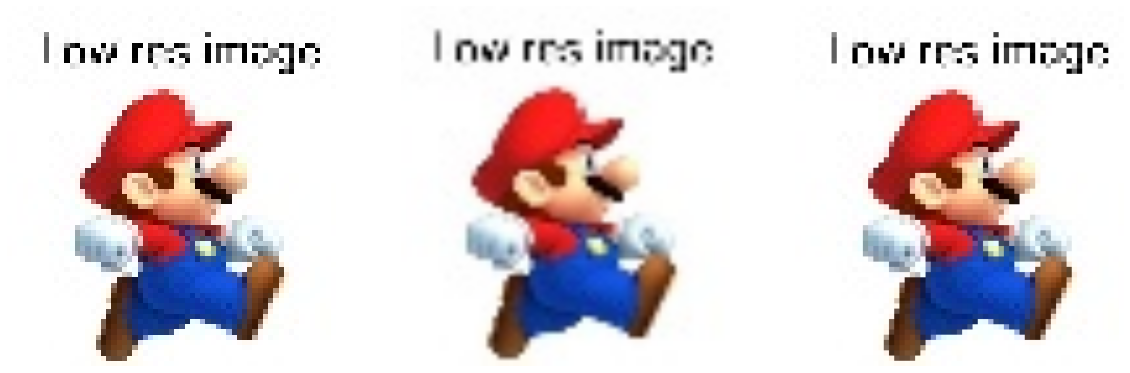

In [3]:
# main code
fig, ax=plt.subplots(1,3,figsize=(20, 20))
# read image
img=cv2.imread('./src/mario.jpg')
# apply bilinear interpolation
bi_img=Interpolation_bilinear(img.copy())
# apply nearest neighbor interpolation
nn_img=Interpolation_NearestNeighbor(img.copy())
# show 
ax[0].axis('off')
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].imshow(cv2.cvtColor(bi_img, cv2.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].imshow(cv2.cvtColor(nn_img, cv2.COLOR_BGR2RGB))

# Compare result and write down you observation

從結果圖可以看出，NearestNeighbor在高和寬都放大八倍之後，和原圖效果基本上沒有太多的差異，這可能是因為在使用matplot輸出圖片時，其尺寸被限制住了。而使用Bilinear的效果與原圖的差異就比較顯著一些，可以看得出來Bilinear在整體呈現上比較柔和一些，少了很多馬賽克感覺的顆粒感，但相對的，肉眼感知上會認為比較模糊一些，這是因為每一個新像素的值是原本像素值的比例所組成，在做了放大之後，原始像素之間的過程就會比較漸層一些，而非NearestNeighbor那樣中間的過程都是同一個value。

## **Question 2 - Image enhencement (30%)**
implement the following steps to correct the image **dark room**. (You cannot use any built-in functions to perform the enhancement procedure)

In [4]:
YIQ_matrix = np.array([[0.299, 0.587, 0.114], 
                  [0.596, -0.275, -0.321], 
                  [0.212, -0.523, 0.311]])

def RGB2YIQ(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply RGB to YIQ conversion to img
    img_out = np.dot(img, YIQ_matrix.T)
    
    return img_out
def YIQ2RGB(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply YIQ to RGB conversion to img
    inv_YIQ_matrix = np.linalg.inv(YIQ_matrix)
    img_out = np.dot(img, inv_YIQ_matrix.T).astype('uint8')
    
    return img_out
def gamma_enhencement(img,gamma):
    '''
    In :
        img : image before enhancement
        gamma : hyperparameter for enhancement
    Out : 
        img_out : image after enhancement
    '''
    # TODO apply gamma enhancement to img
    img_out = img.copy()
    img_out[:, :, 0] = np.power(img_out[:, :, 0] / 255, gamma)
    
    return img_out

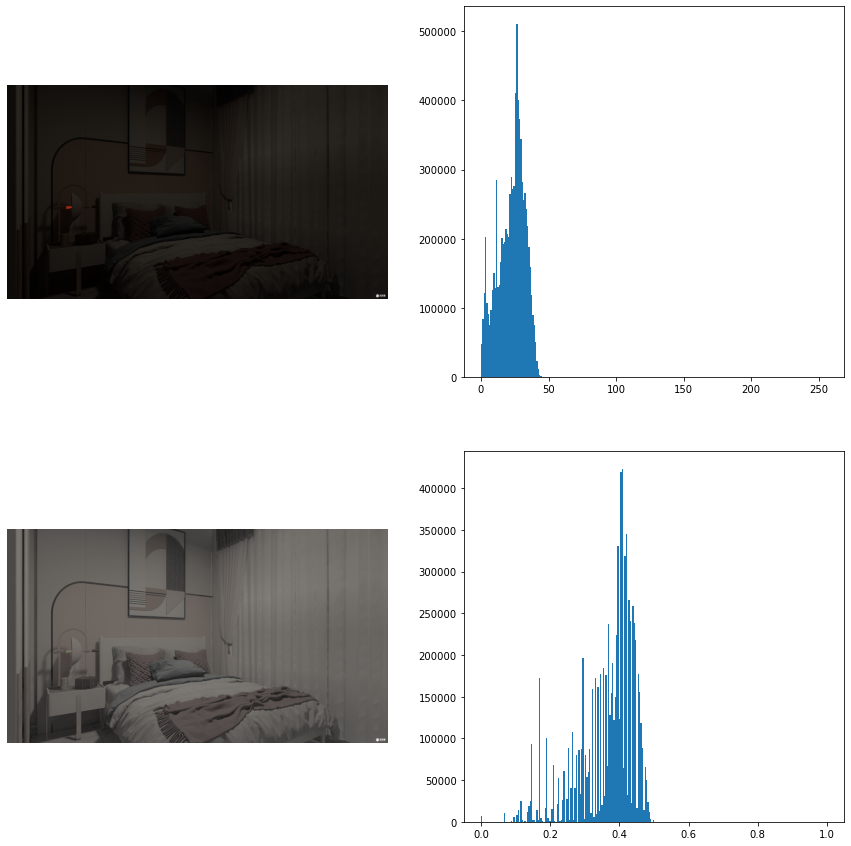

In [5]:
# main code
fig, ax=plt.subplots(2,2,figsize=(15,15))
# read image
img=cv2.imread('./src/darkroom.jpg')
# convert BGR to RGB
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# show image
ax[0][0].axis('off')
ax[0][0].imshow(img)
# apply RGB to YIQ conversion
img_yiq=RGB2YIQ(img.copy())

#show y channel's histogram before enhancement
_=ax[0][1].hist(img_yiq[:,:,0].ravel(),256,[0,256])

# apply gamma enhancement 
# TODO adjuest the suitable gamma value
gamma=0.4
enhence_img=gamma_enhencement(img_yiq.copy(),gamma)
# apply YIQ to RGB conversion
clip_back_img = enhence_img.copy()
clip_back_img[:, :, 0] = enhence_img[:, :, 0] * 255 # clip back to 0 ~ 255
enhence_img_rgb=YIQ2RGB(clip_back_img.copy())

# show the emhanced image
ax[1][0].axis('off')
ax[1][0].imshow(enhence_img_rgb)
#show y channel's histogram after enhancement
_= ax[1][1].hist(enhence_img[:,:,0].ravel(),256,[0,1])


# Compare result and write down you observation

在運用gamma transform時，因為是對亮度進行調整，所以在運算時只需要對YIQ中的Y(亮度) channel做運算即可，並且需要注意一點是，Y在經過gamma transform後的值域會落在0~1之間，在轉換完要打印圖片時，需要先將其轉回0~255的值域，這樣打印出來的圖片才是正常的。
從上方輸出的結果可以看出，當gamma選在0.4的時候，可以讓圖片整體的呈現度良好，既提高了亮度，也保留了陰影細節，若是將其再調小，則會因為亮度過高而導致圖片有些失真。而若是維持原本gamma=1.5的情況，則是下方圖片的輸出結果，可以看出整體圖片因調的過暗，導致部分區域像素整個失常。<br>
![](./src/q2_origin.jpg)

## **Question 3 - Image Compression (30%)**
Transform the image tokyo.jpg from spatial domain to frequency domain with DCT   
for compression and reconstruct the compressed image using inverse DCT with reduced numbers 
and bits of DCT coefficients.  


## Remark
**For DCT transformation you can use cv2.dct and cv2.idct**

In [6]:
Luminance_Qtable=([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 36, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

Chrominance_Qtable=np.array([
    [17, 18, 24, 47, 99, 99, 99, 99],
    [18, 21, 26, 66, 99, 99, 99, 99],
    [24, 26, 56, 99, 99, 99, 99, 99],
    [47, 66, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99]
])


def PSNR(img1, img2):
    '''
    In :
        img1 : source image
        img2 : target image
    Out : 
        psnr : PSNR value
    '''
    # TODO calculate PSNR value
    mse = np.mean((img1 - img2) ** 2)
    peak_square = np.max(img1) ** 2
    psnr = 10 * math.log10(peak_square / mse)
    
    return psnr


def RGB2YCbCr(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply RGB to YCbCr conversion to img
    YCbCr_matrix = np.array([[0.257, 0.504, 0.098],
                             [-0.148, -0.291, 0.439],
                             [0.439, -0.368, -0.071]])
    shift_vector = np.array([16, 128, 128])
    img_out = np.dot(img, YCbCr_matrix.T) + shift_vector.T
    
    return img_out


def YCbCr2RGB(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply YCbCr to RGB conversion to img
    img_out=img.copy()
    inv_YCbCr_matrix = np.array([[1.164, 0, 1.596],
                                 [1.164, -0.392, -0.813],
                                 [1.164, 2.017, 0]])
    shift_vector = np.array([16, 128, 128])
    img_out = np.dot((img - shift_vector.T), inv_YCbCr_matrix.T).astype('uint8')
    
    return img_out


def upsample2(img):
    '''
    In :
        img : image before upsampling
    Out : 
        img_out : image after upsampling
    '''
    # TODO apply upsampling to img
    oringin_height, origin_width = img.shape[0], img.shape[1]
    img_out = np.zeros((oringin_height * 2, origin_width * 2, 1))
    for i in range(oringin_height):
        for j in range(origin_width):
            upsample_i, upsample_j = i * 2, j * 2
            img_out[upsample_i, upsample_j] = img[i, j]
            img_out[upsample_i,  upsample_j + 1] = img[i, j]
            img_out[upsample_i + 1, upsample_j] = img[i, j]
            img_out[upsample_i + 1, upsample_j + 1] = img[i, j] # origin version
            
    # img_out = np.repeat(np.repeat(img, 2, axis=0), 2, axis=1) # GPT optimize version
    
    return img_out
    

def Chromanance_subsample(img):
    '''
    In :
        img : Ycbcr image before subsampling
    Out : 
        Y : Y channel
        Cb: Cb channel
        Cr: Cr channel
    '''
    # TODO apply chromanance subsampling to img
    height, width = img.shape[0], img.shape[1]
    Y_matrix = img[:, :, 0]
    
    Cb_matrix = np.zeros((int(height / 2), int(width / 2), 1))
    Cr_matrix = np.zeros((int(height / 2), int(width / 2), 1))
    for i in range(0, height, 2):
        for j in range(0, width, 2):
            Cb_matrix[int(i / 2), int(j / 2)] = img[i, j, 1]
            Cr_matrix[int(i / 2), int(j / 2)] = img[i ,j, 2]
            
    return Y_matrix, Cb_matrix, Cr_matrix # origin version

    # Cb_matrix = img[::2, ::2, 1]
    # Cr_matrix = img[::2, ::2, 2]
    # return Y_matrix, Cb_matrix[..., np.newaxis], Cr_matrix[..., np.newaxis] # GPT optimize version


def Patch_DCT_with_Quantization(img, Qtable):
    '''
    In :
        img : image before DCT and quantization
        Qtable : quantization table
    Out : 
        img_out : image after DCT and quantization
    '''
    # TODO apply DCT and quantization to img
    height, width = img.shape[0], img.shape[1]
    img_out = np.ones((height, width)) # avoid the edge condition 0 be counted into rate
    for i in range(0, height, 8):
        for j in range(0, width, 8):
            if(i + 8 >= height or j + 8 >= width): continue
            img_out[i:i+8, j:j+8] = np.round(cv2.dct(img[i:i+8, j:j+8]) / Qtable)
        
    return img_out


def Patch_iDCT_with_Dequantization(img,Qtable):
    '''
    In :
        img : image before DCT and quantization
        Qtable : quantization table
    Out : 
        img_out : image after iDCT and dequantization
    '''
    # TODO apply DCT and quantization to img
    height, width = img.shape[0], img.shape[1]
    img_out = np.ones((height, width)) # avoid the edge condition 0 be counted into rate
    for i in range(0, height, 8):
        for j in range(0, width, 8):
            if(i + 8 >= height or j + 8 >= width): continue
            img_out[i:i+8, j:j+8] = cv2.idct(img[i:i+8, j:j+8] * Qtable) 
    
    return img_out



The PSNR after subsampling is 40.860066021248215
The compression ratio after subsampling is 2.0
The rate of nonezeros in the compressed image is  0.10420766025411168
the PSNR after DCT compression is 33.117064285685096


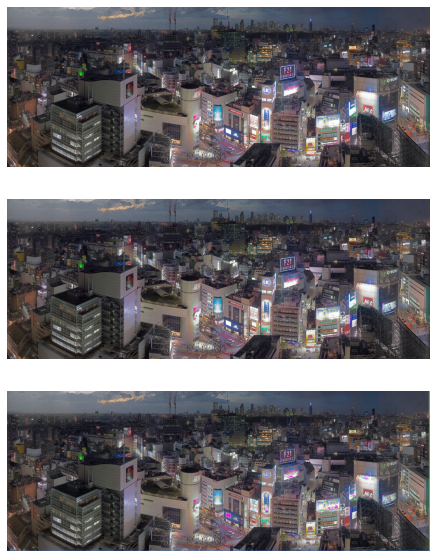

In [8]:
# main code
fig, ax=plt.subplots(3,1,figsize=(10,10))

# read image
img=cv2.imread('./src/tokyo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original_byte=img.shape[0]*img.shape[1]*img.shape[2]
# show original image
ax[0].axis('off')
ax[0].imshow(img)
# convert RGB to Ycbcr
ycbcr_img=RGB2YCbCr(img.copy())
# Chrominance subsampling with 4:2:0
Y,Cb,Cr=Chromanance_subsample(ycbcr_img)
# upsample Cb and Cr channels
up_Cb=upsample2(Cb)
up_Cr=upsample2(Cr)
#TODO merge Y, up_Cb, up_Cr channels and transform back to RGB
YCbCr_img = np.dstack((Y, up_Cb, up_Cr))
compressed_img = YCbCr2RGB(YCbCr_img)
# show the compressed image
# print(compressed_img)
ax[1].axis('off')
ax[1].imshow(compressed_img)
# calculate the PSNR after reconstruction
psnr=PSNR(img, compressed_img)
print("The PSNR after subsampling is",psnr)
#TODO calculate compression ratio after subsampling
compression_ratio= img.size / (Y.size + Cb.size + Cr.size)
print("The compression ratio after subsampling is",compression_ratio)
# apply DCT and quantization to Y channel
compressed_Y=Patch_DCT_with_Quantization(Y,Luminance_Qtable)
# apply DCT and quantization to Cb channel
compressed_Cb=Patch_DCT_with_Quantization(Cb,Chrominance_Qtable)
# apply DCT and quantization to Cr channel
compressed_Cr=Patch_DCT_with_Quantization(Cr,Chrominance_Qtable)

# # TODO calculate the rate of nonezeros in the compressed image
total_size = compressed_Y.size + compressed_Cb.size + compressed_Cr.size
none_zeros = np.count_nonzero(compressed_Y) + np.count_nonzero(compressed_Cb) + np.count_nonzero(compressed_Cr)
rate = none_zeros / total_size
print("The rate of nonezeros in the compressed image is ",rate)

#apply inverse DCT and dequantization to Y channel
recover_Y=Patch_iDCT_with_Dequantization(compressed_Y,Luminance_Qtable)
#apply inverse DCT and dequantization to Cb channel
recover_Cb=Patch_iDCT_with_Dequantization(compressed_Cb,Chrominance_Qtable)
#apply inverse DCT and dequantization to Cr channel
recover_Cr=Patch_iDCT_with_Dequantization(compressed_Cr,Chrominance_Qtable)

#TODO upsample and merge Y, Cb, Cr channels and transform back to RGB
recover_up_Cb=upsample2(recover_Cb)
recover_up_Cr=upsample2(recover_Cr)
recover_ycbcr = np.dstack((recover_Y, recover_up_Cb, recover_up_Cr))
recover_img = YCbCr2RGB(recover_ycbcr)

# recover_img=img.copy()
ax[2].axis('off')
ax[2].imshow(recover_img)
# calculate the PSNR value
psnr=PSNR(img,recover_img)
print("the PSNR after DCT compression is",psnr)
